In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./1_Data_source/datasets_hi4/train-data.csv", sep=';')

In [3]:
data[1000:1010]


,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3,Month 4
1000,2033855,74999,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-8957,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-9,EOL,may-jul 2023,NaN,0,0,0
1001,1986720,27864,EAJP,AU,AU_DC_Adelaide,International Operations,Pacific,Australia,reference-1958,Product Line-1,Division-1,Customer Segmentation-16,Strategic Product Family-4,NaN,may-jul 2023,NaN,0,0,0
1002,544209,54495,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5210,Product Line-4,Division-3,Customer Segmentation-44,Strategic Product Family-9,NaN,may-aug 2021,87,39,57,103
1003,956394,221823,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-6300,Product Line-4,Division-3,Customer Segmentation-1,Strategic Product Family-12,NaN,sep-dec 2021,0,0,0,0
1004,1630426,161284,EUROPE,DE,NL_DC_HLD,Europe Operations,DACH,Germany,reference-3737,Product Line-3,Division-2,Customer Segmentation-50,Strategic Product Family-7,NPI,sep-dec 2022,0,0,1,0
1005,1846567,132568,EUROPE,DK,SE_DC_Orebro,Europe Operations,Nordic & Baltics,Denmark,reference-9455,Product Line-4,Division-3,Customer Segmentation-13,Strategic Product Family-12,NaN,jan-apr 2023,0,0,0,0
1006,872266,137695,EUROPE,ES,ES_DC_SPL,Europe Operations,Iberia,Spain,reference-2660,Product Line-2,Division-2,Customer Segmentation-13,Strategic Product Family-5,NaN,sep-dec 2021,0,0,0,0
1007,719865,230151,CHINA,CN,CN_DC_Beijing,China Operations,China & HK,China,reference-7418,Product Line-4,Division-3,Customer Segmentation-13,Strategic Product Family-9,NaN,may-aug 2021,0,0,0,0
1008,1319278,94993,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-2673,Product Line-2,Division-2,Customer Segmentation-16,Strategic Product Family-5,NaN,may-aug 2022,0,0,0,0
1009,606719,117005,EUROPE,DK,SE_DC_Orebro,Europe Operations,Nordic & Baltics,Denmark,reference-6996,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-9,NaN,may-aug 2021,0,0,0,0


In [4]:
for col in data.columns.values:
    print(f"{col}  -  {len(data[col].unique())}")

index  -  1762970
id_product  -  244857
Region  -  4
Country  -  31
Site  -  88
Operations  -  5
Zone  -  12
Cluster  -  18
Reference proxy  -  22406
Product  Line proxy  -  6
Division proxy  -  3
Customer Persona proxy  -  72
Strategic Product Family proxy  -  19
Product Life cycel status  -  4
Date  -  9
Month 1  -  4620
Month 2  -  4471
Month 3  -  5040
Month 4  -  4360


In [5]:
data_ = data.copy()


In [6]:
def data_prep_train(df):
    """ Prepare data for ML tasks """
    # Transform volume data into float64 data and discarding NaN
    for month in ["Month 1", "Month 2", "Month 3", "Month 4"]:
        df[month] = df[month].str.replace(" ", "").fillna("0").astype(float)
    
    # # Clean Date infos
    # month_lib = {
    #     "jan": 0,
    #     "feb": 1,    
    #     "mar": 2,
    #     "apr": 3,    
    #     "may": 4,
    #     "jun": 5,    
    #     "jul": 6,
    #     "aug": 7,    
    #     "sep": 8,
    #     "oct": 9,    
    #     "nov": 10,
    #     "dec": 11
    # }
    # date = df["Date"].str.split(n=1, expand=True)
    # df["Year"] = date[1]
    # df["Quadr"] = pd.to_numeric(date[0].str.slice(stop=3).replace(month_lib))//3
    # df["Quadr"] = df["Quadr"].astype(str)
    
    # Get rid off duplicates
    df.drop_duplicates(inplace=True)

def data_prep_test(df):
    """ Prepare data for ML tasks """
    # Transform volume data into float64 data and discarding NaN
    for month in ["Month 1", "Month 2", "Month 3"]:
        df[month] = df[month].str.replace(" ", "").fillna("0").astype(float)
        
    # # Clean Date infos
    # month_lib = {
    #     "jan": 0,
    #     "feb": 1,    
    #     "mar": 2,
    #     "apr": 3,    
    #     "may": 4,
    #     "jun": 5,    
    #     "jul": 6,
    #     "aug": 7,    
    #     "sep": 8,
    #     "oct": 9,    
    #     "nov": 10,
    #     "dec": 11
    # }
    # date = df["Date"].str.split(n=1, expand=True)
    # df["Year"] = date[1]
    # df["Quadr"] = pd.to_numeric(date[0].str.slice(stop=3).replace(month_lib))//3
    # df["Quadr"] = df["Quadr"].astype(str)

    # KEEP duplicates
    #df.drop_duplicates(inplace=True)


In [7]:
data_prep_train(data_)

In [8]:
data_.dtypes

index                               int64
id_product                          int64
Region                             object
Country                            object
Site                               object
Operations                         object
Zone                               object
Cluster                            object
Reference proxy                    object
Product  Line proxy                object
Division proxy                     object
Customer Persona proxy             object
Strategic Product Family proxy     object
Product Life cycel status          object
Date                               object
Month 1                           float64
Month 2                           float64
Month 3                           float64
Month 4                           float64
dtype: object

In [9]:
data_[1000:1010]

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3,Month 4
1000,2033855,74999,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-8957,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-9,EOL,may-jul 2023,0.0,0.0,0.0,0.0
1001,1986720,27864,EAJP,AU,AU_DC_Adelaide,International Operations,Pacific,Australia,reference-1958,Product Line-1,Division-1,Customer Segmentation-16,Strategic Product Family-4,NaN,may-jul 2023,0.0,0.0,0.0,0.0
1002,544209,54495,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5210,Product Line-4,Division-3,Customer Segmentation-44,Strategic Product Family-9,NaN,may-aug 2021,87.0,39.0,57.0,103.0
1003,956394,221823,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-6300,Product Line-4,Division-3,Customer Segmentation-1,Strategic Product Family-12,NaN,sep-dec 2021,0.0,0.0,0.0,0.0
1004,1630426,161284,EUROPE,DE,NL_DC_HLD,Europe Operations,DACH,Germany,reference-3737,Product Line-3,Division-2,Customer Segmentation-50,Strategic Product Family-7,NPI,sep-dec 2022,0.0,0.0,1.0,0.0
1005,1846567,132568,EUROPE,DK,SE_DC_Orebro,Europe Operations,Nordic & Baltics,Denmark,reference-9455,Product Line-4,Division-3,Customer Segmentation-13,Strategic Product Family-12,NaN,jan-apr 2023,0.0,0.0,0.0,0.0
1006,872266,137695,EUROPE,ES,ES_DC_SPL,Europe Operations,Iberia,Spain,reference-2660,Product Line-2,Division-2,Customer Segmentation-13,Strategic Product Family-5,NaN,sep-dec 2021,0.0,0.0,0.0,0.0
1007,719865,230151,CHINA,CN,CN_DC_Beijing,China Operations,China & HK,China,reference-7418,Product Line-4,Division-3,Customer Segmentation-13,Strategic Product Family-9,NaN,may-aug 2021,0.0,0.0,0.0,0.0
1008,1319278,94993,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-2673,Product Line-2,Division-2,Customer Segmentation-16,Strategic Product Family-5,NaN,may-aug 2022,0.0,0.0,0.0,0.0
1009,606719,117005,EUROPE,DK,SE_DC_Orebro,Europe Operations,Nordic & Baltics,Denmark,reference-6996,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-9,NaN,may-aug 2021,0.0,0.0,0.0,0.0


In [10]:
data_.describe()

,index,id_product,Month 1,Month 2,Month 3,Month 4
count,1.762970e+06,1.762970e+06,1.762970e+06,1.762970e+06,1.762970e+06,1.762970e+06
mean,1.101680e+06,1.224159e+05,2.887069e+01,2.899735e+01,3.587396e+01,2.679187e+01
std,6.362992e+05,7.068119e+04,7.409607e+02,7.189398e+02,1.155221e+03,6.927619e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,5.507065e+05,6.119400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.101724e+06,1.223860e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.652811e+06,1.836208e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.203712e+06,2.448560e+05,1.875400e+05,2.711010e+05,4.812900e+05,2.452200e+05


(0.0, 100000.0)

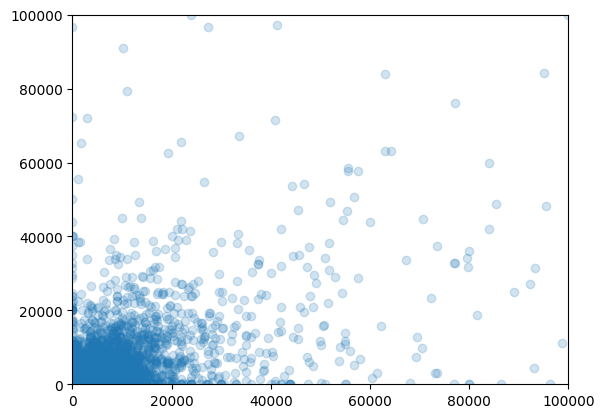

In [11]:
plt.scatter(data_["Month 3"], data_["Month 4"], alpha=.2)
plt.xlim(0, 100000)
plt.ylim(0, 100000)

In [12]:
X = data_.drop(columns="Month 4")
y = data_["Month 4"]

## Train / Test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=42, # keep 42
    test_size=0.2, 
)

# to be refined to obtain train / val  / test ? or cross-val ?


In [24]:
# Get rid off all records with zero values over the 4 months (for the training only)
X_train_NZ = X_train[X_train["Month 1"] + X_train["Month 2"] + X_train["Month 3"] !=0]
y_train_NZ = y_train[X_train["Month 1"] + X_train["Month 2"] + X_train["Month 3"]!=0]

In [25]:
print('Size of each set: ')
print('Total (X, y):', y.count(), '     =   Train_tot:',y_train.count(), '  +  Test_tot:', y_test.count())
print('Total Non Zero Train ', y_train_NZ.count())
print(y_train_NZ.sum())

Size of each set: 
Total (X, y): 1762970      =   Train_tot: 1410376   +  Test_tot: 352594
Total Non Zero Train  522800
36734046.0


## Define metrics


In [26]:
from sklearn.metrics import mean_squared_error

def mse(y_hat, y, squared_ = False):
    """ Compute the Root Mean Squared Error """
    return mean_squared_error(y_hat, y, squared = squared_)

def norm_mse(y_hat, y, squared_ = False):
    """ compute the Root Mean Squared Error normalized by a null prediction"""
    return mean_squared_error(y_hat, y, squared = squared_) / mean_squared_error(np.zeros(y.shape), y, squared = squared_)

def RMSE_hfactory(y_hat, y, squared_ = False):
    R_0 = mean_squared_error(np.zeros(y.shape), y, squared = squared_) 
    rmse_h = (R_0- 0.8 * mse(y_hat, y))/R_0
    return rmse_h

def score_func(y_hat, y, w, squared_ = False):
    """ Compute 
    w = penalize loss for y_hat > y """
    score = (mean_squared_error(y_hat[y_hat>y], y[y_hat>y], squared=True) * w + mean_squared_error(y_hat[y_hat>y], y[y_hat>y], squared=True))
    if not squared_:
        score = np.sqrt(score)
    score /= mean_squared_error(np.zeros(y.shape), y, squared = squared_)


## Prepare models pipelines

In [27]:
import sklearn
sklearn.set_config(display='diagram')

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    #StandardScaler(),
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant"),
    OneHotEncoder(handle_unknown='ignore'),
)


cat_col = ['Date', 'Region']
cat_col_1 = ['Product Life cycel status', 'Date', 'Site']#, 'Region']
cat_col_2 = ['Product Life cycel status', 'Date', 'Site', 'Strategic Product Family proxy']
cat_col_3 = ['Product Life cycel status', 'Date', 'Site', 'Country', 'Strategic Product Family proxy']



# cat_col = ['Product Life cycel status', 'Date', 'Region', 'Product  Line proxy']


preprocessor = make_column_transformer(
    (numeric_transformer, make_column_selector(dtype_include="float64")),
    (categorical_transformer, cat_col),
    remainder="drop",
)
preprocessor_1 = make_column_transformer(
    (numeric_transformer, make_column_selector(dtype_include="float64")),
    (categorical_transformer, cat_col_1),
    remainder="drop",
)
preprocessor_2 = make_column_transformer(
    (numeric_transformer, make_column_selector(dtype_include="float64")),
    (categorical_transformer, cat_col_2),
    remainder="drop",
)
preprocessor_3 = make_column_transformer(
    (numeric_transformer, make_column_selector(dtype_include="float64")),
    (categorical_transformer, cat_col_3),
    remainder="drop",
)

model_LR =make_pipeline(
    preprocessor,
    LinearRegression(),
)

n_est=500
m_d=7

model_RF_1 = make_pipeline(
    preprocessor_1,
    RandomForestRegressor(
        n_estimators=n_est,
        max_depth=m_d,
        random_state=42,
        ),
)
model_RF_2 = make_pipeline(
    preprocessor_2,
    RandomForestRegressor(
        n_estimators=n_est,
        max_depth=m_d,
        random_state=42,
        ),
)
model_RF_3 = make_pipeline(
    preprocessor_3,
    RandomForestRegressor(
        n_estimators=n_est,
        max_depth=m_d,
        random_state=42,
        ),
)

model_AB = make_pipeline(
    preprocessor,
    AdaBoostRegressor(
        random_state=42,
        ),
)

model_XGB_2 = make_pipeline(
    preprocessor_2,
    XGBRegressor(
        random_state=42,
        max_depth=7,
        n_estimators=500
        ),
)

In [29]:
model_RF_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2e2274c90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product Life cycel status',
                                                   'Date', 'Site',
                                                   'Strategic Product Family '
                                                   'proxy'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=7, n_estimators=500,
                                       random_state=42))])

In [30]:
model_list = [model_LR, model_RF_2]#, model_RF_2, model_RF_3]#, model_XGB]

for model_ in model_list:
    # model_.fit(X_train, y_train)

    # y_train_hat = model_.predict(X_train)
    # y_test_hat = model_.predict(X_test)
    
    # print(mse(y_train_hat, y_train))
    # print(mse(y_test_hat, y_test))
    # print(mse(np.zeros(y_test.shape), y_test))
    # print(norm_mse(y_test_hat, y_test))
    # print("\n")

    #----- Non Zero Training -------
    model_.fit(X_train_NZ, y_train_NZ)

    y_train_hat = model_.predict(X_train)
    y_test_hat = model_.predict(X_test)

    y_train_hat[X_train["Month 1"] + X_train["Month 2"] + X_train["Month 3"]==0] = 0
    y_test_hat[X_test["Month 1"] + X_test["Month 2"] + X_test["Month 3"]==0] = 0
    print(mse(y_train_hat, y_train))
    print(mse(y_test_hat, y_test))
    print(mse(np.zeros(y_test.shape), y_test))
    print(norm_mse(y_test_hat, y_test))
    print(RMSE_hfactory(y_test_hat, y_test))
    print("\n")


538.8500203426303
484.80024192028554
649.2042895583725
0.7467606879955702


358.2714254463043
455.82215460306367
649.2042895583725
0.7021243727658378




In [46]:
model_list = [model_LR, model_XGB_2]#, model_RF_2, model_RF_3]#, model_XGB]

for model_ in model_list:
    # model_.fit(X_train, y_train)

    # y_train_hat = model_.predict(X_train)
    # y_test_hat = model_.predict(X_test)
    
    # print(mse(y_train_hat, y_train))
    # print(mse(y_test_hat, y_test))
    # print(mse(np.zeros(y_test.shape), y_test))
    # print(norm_mse(y_test_hat, y_test))
    # print("\n")

    #----- Non Zero Training -------
    model_.fit(X_train_NZ, y_train_NZ)

    y_train_hat = model_.predict(X_train)
    y_test_hat = model_.predict(X_test)

    y_train_hat[X_train["Month 1"] + X_train["Month 2"] + X_train["Month 3"]==0] = 0
    y_test_hat[X_test["Month 1"] + X_test["Month 2"] + X_test["Month 3"]==0] = 0
    print(mse(y_train_hat, y_train))
    print(mse(y_test_hat, y_test))
    print(mse(np.zeros(y_test.shape), y_test))
    print(norm_mse(y_test_hat, y_test))
    print(RMSE_hfactory(y_test_hat, y_test))
    print("\n")


538.8500203426303
484.80024192028554
649.2042895583725
0.7467606879955702
0.40259144960354387


323.3107832292425
504.4020588829874
649.2042895583725
0.7769542915776354
0.3784365667378916




In [48]:
y_test.mean()

25.157419014503933

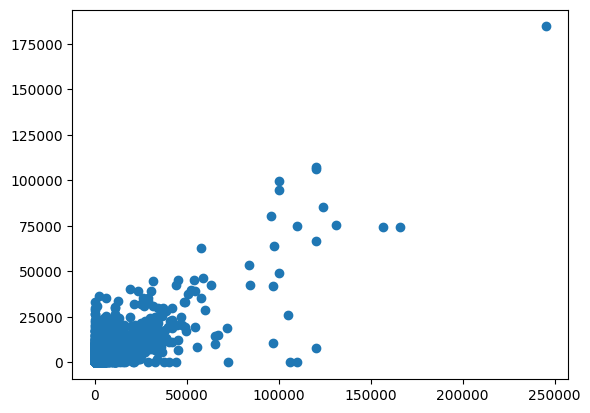

In [230]:
plt.scatter(y_train, y_train_hat)

(0.0, 10000.0)

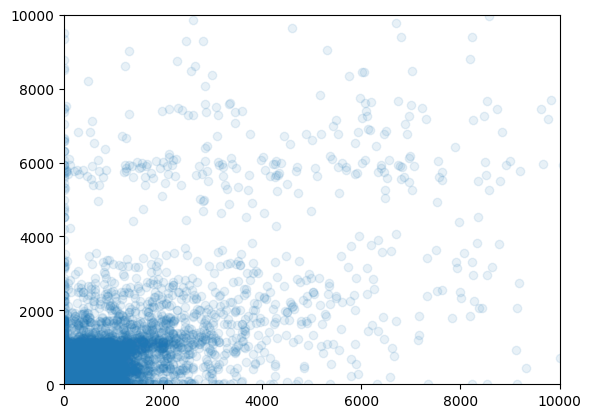

In [231]:
plt.scatter(y_test, y_test_hat, alpha=.1)
plt.xlim(-100,10000)
plt.ylim(-100,10000)

## Fine-tune model

In [232]:
model_RF_1.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median'))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x2b5b8cbd0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['Product Life cycel status', 'Date'])])),
  ('randomforestregressor',
   RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(tra

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

# Select the model to tune
model_ = model_RF_1

cv_ = StratifiedShuffleSplit(n_splits=5, test_size=.2)
param_grid = {
    
}

grid_pipeline = GridSearchCV(model_, param_grid, cv=cv_, scoring=my_scorer)
grid_pipeline.fit(X_train, y_train)
grid_pipeline.best_params_


In [31]:
model_ = model_RF_2
y_train_hat = model_.predict(X_train)
y_test_hat = model_.predict(X_test)

y_train_hat[X_train["Month 1"] + X_train["Month 2"] + X_train["Month 3"]==0] = 0
y_test_hat[X_test["Month 1"] + X_test["Month 2"] + X_test["Month 3"]==0] = 0
print(mse(y_train_hat, y_train))
print(mse(y_test_hat, y_test))
print(mse(np.zeros(y_test.shape), y_test))
print(norm_mse(y_test_hat, y_test))
print(RMSE_hfactory(y_test_hat, y_test))
print("\n")

358.2714254463043
455.82215460306367
649.2042895583725
0.7021243727658378
0.4383005017873296




In [32]:
y_test_hat.sum()

8968083.172047125

## Run the selected model on the test data to be submitted

In [33]:
data_submit = pd.read_csv("./1_Data_source/datasets_hi4/X_test.csv", sep=";")

In [34]:
data_submit_ = data_submit.copy()

In [35]:
data_prep_test(data_submit_)

In [36]:
data_submit_.dtypes

index                               int64
id_product                          int64
Region                             object
Country                            object
Site                               object
Operations                         object
Zone                               object
Cluster                            object
Reference proxy                    object
Product  Line proxy                object
Division proxy                     object
Customer Persona proxy             object
Strategic Product Family proxy     object
Product Life cycel status          object
Date                               object
Month 1                           float64
Month 2                           float64
Month 3                           float64
dtype: object

In [37]:
data_submit_.head()

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3
0,490548,834,EAJP,AU,AU_DC_Sydney,International Operations,Pacific,Australia,reference-145,Product Line-1,Division-1,Customer Segmentation-8,Strategic Product Family-1,EOL,may-aug 2021,20435.0,610.0,4270.0
1,2167957,209101,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-13121,Product Line-4,Division-3,Customer Segmentation-66,Strategic Product Family-9,NaN,may-jul 2023,0.0,0.0,0.0
2,1999013,40157,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3409,Product Line-3,Division-2,Customer Segmentation-4,Strategic Product Family-7,NaN,may-jul 2023,0.0,0.0,4.0
3,469221,224364,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-19450,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-13,NaN,jan-apr 2021,7.0,150.0,136.0
4,1171716,192288,EUROPE,BE,NL_DC_HLD,Europe Operations,BeNe,Belgium,reference-3686,Product Line-3,Division-2,Customer Segmentation-4,Strategic Product Family-7,RaMPDOWN,jan-apr 2022,0.0,0.0,1.0


In [38]:
X_submit = data_submit_

In [39]:
y_submit = model_RF_2.predict(X_submit)
y_submit[X_submit["Month 1"] + X_submit["Month 2"] + X_submit["Month 3"]==0] = 0

In [40]:
y_submit_ = pd.concat([X_submit["index"], pd.DataFrame(y_submit, columns=["Month 4"])], axis=1)


In [41]:
X_submit.head()

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3
0,490548,834,EAJP,AU,AU_DC_Sydney,International Operations,Pacific,Australia,reference-145,Product Line-1,Division-1,Customer Segmentation-8,Strategic Product Family-1,EOL,may-aug 2021,20435.0,610.0,4270.0
1,2167957,209101,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-13121,Product Line-4,Division-3,Customer Segmentation-66,Strategic Product Family-9,NaN,may-jul 2023,0.0,0.0,0.0
2,1999013,40157,EAJP,NZ,AU_DC_ALD,International Operations,Pacific,New Zealand,reference-3409,Product Line-3,Division-2,Customer Segmentation-4,Strategic Product Family-7,NaN,may-jul 2023,0.0,0.0,4.0
3,469221,224364,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-19450,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-13,NaN,jan-apr 2021,7.0,150.0,136.0
4,1171716,192288,EUROPE,BE,NL_DC_HLD,Europe Operations,BeNe,Belgium,reference-3686,Product Line-3,Division-2,Customer Segmentation-4,Strategic Product Family-7,RaMPDOWN,jan-apr 2022,0.0,0.0,1.0


In [42]:
y_submit_['Month 4'].head()

0    11025.604814
1        0.000000
2        8.215690
3       93.758169
4        8.215690
Name: Month 4, dtype: float64

In [43]:
y_submit_.to_csv("y_test_team21_2.csv", index=False, sep=";")

## CO2 Emissions impact

In [ ]:
from sklearn. metrics import make_scorer
my_scorer = make_scorer(score_func, greater_is_better=False, needs_proba=False, needs_threshold=False, **kwargs)